In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.Age.isnull().sum()

177

In [3]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

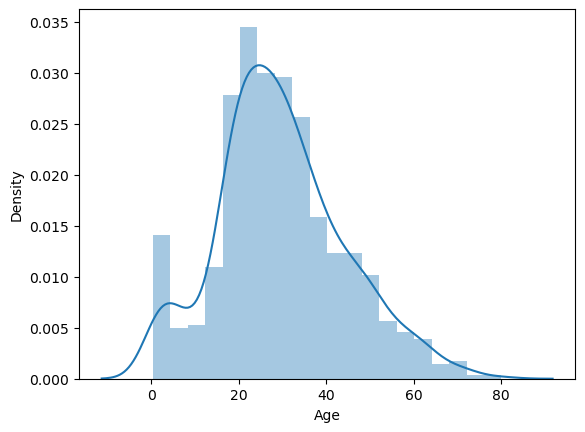

In [4]:
sns.distplot(df.Age.dropna())

# lookas like normal distribution and cant find any outliers as such

when we have normal distribution we use the technique is Estimate Outliers Extreme Value Analysis

if data is normally distributed we apply diffetent formula to calculate IQR if data is skewed we use different techniques

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

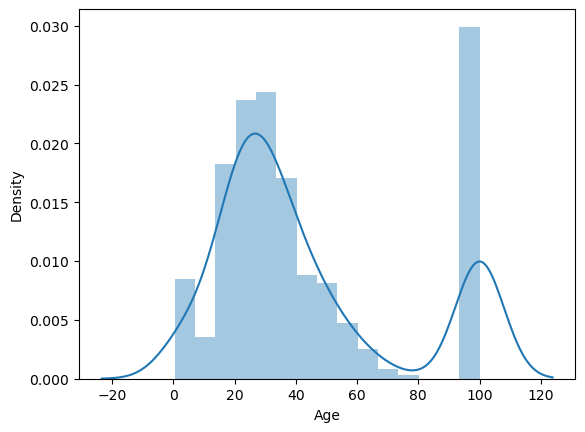

In [5]:
# Creating the outlires by replacing the null values by 100

sns.distplot(df.Age.fillna(100))

### Gaussian Distribution removing Outliers

Text(0, 0.5, 'Passenger')

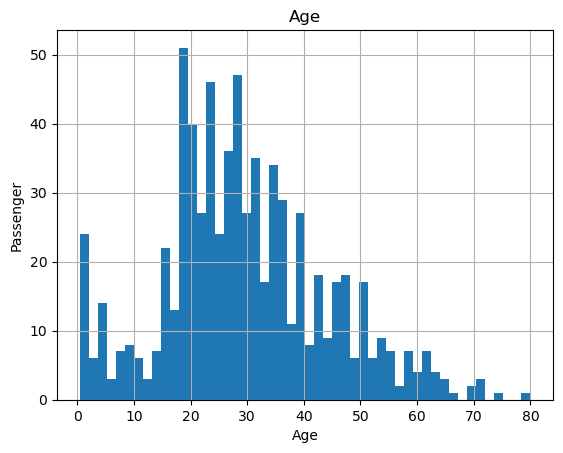

In [6]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Passenger')

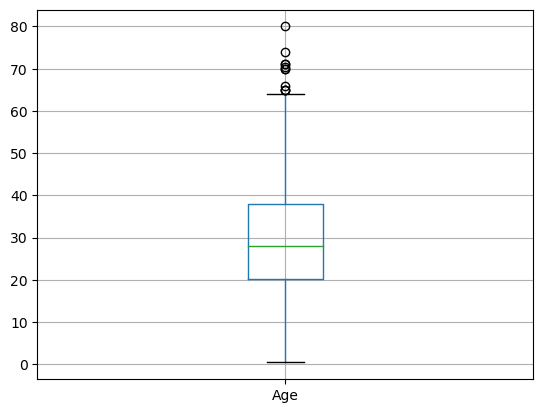

In [7]:
figure=df.boxplot(column='Age')
# by this we get to know we have outliers even before filling null values by 100

In [8]:
df.Age.describe() # we get to know the data of Age Feature

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
# ASSUMING that Age feature is gaussian Distributed we set some boundries whoch differentiates the outliers

upper_boundry=df.Age.mean()+3*df.Age.std()
lower_boundry=df.Age.mean()-3*df.Age.std()
print(lower_boundry,upper_boundry,df.Age.mean())

-13.88037434994331 73.27860964406095 29.69911764705882


For the Gaussian Distribution we consider anything after the upper_boundary as Outliers

In this case its after 73.278

### Skewed data removing Outliers

Text(0, 0.5, 'Passenger')

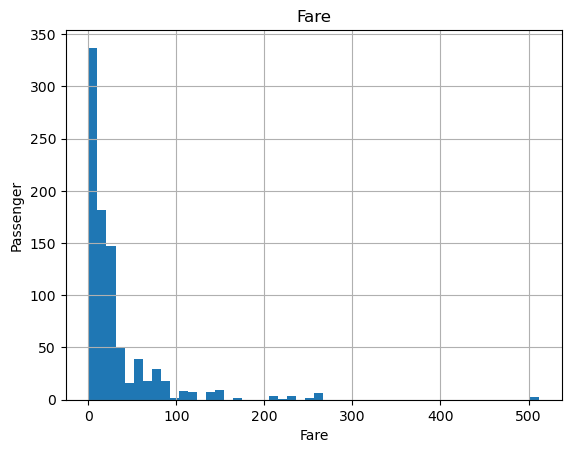

In [10]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Passenger')

# it is right skewed

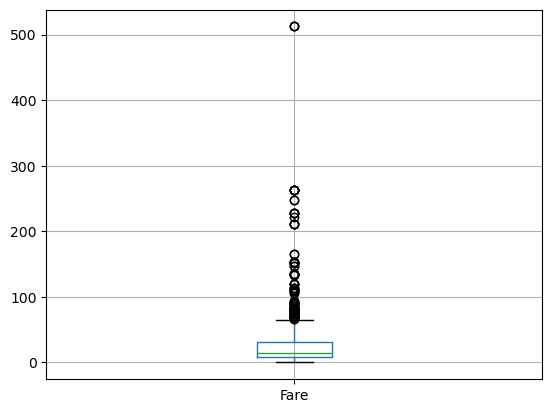

In [11]:
figure=df.boxplot(column='Fare')

In [12]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

in case of skewed data we cannot assure that the IQR technique will work or not we have to verify what % the values the going and remaining 


In [13]:
#computing IQR to calc Boundary

IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

In [14]:
# we take lower/upper bridge based on the IQR and the number multiplied to IQR is given by domain expert

lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge,upper_bridge)

#we are getting 65.6344 is the max of the age to consider when we compare it with df.Age.describe()
#this treats anything after 65 as outliers

-26.724 65.6344


In [15]:
# to find the extreeme Outliers range of the distribution we multiply by 3 irrespective of domain expert

lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge,upper_bridge)

#we are getting 100.2688 is the max of the age to consider when we compare it with df.Age.describe()
#this treats anything after 100 as outliers

-61.358399999999996 100.2688


When ever the data is skewed we have to consider the Extreme Outliers Range to consideration

Other way is to apply Rhobust algorithm as it will not be affected by Outliers

#### Handling Outliers

In [16]:
# Now we are replacing the outliers with the upper_range and the maximum range for both Gaussian(Age) & Skewed(Fare)

data=df.copy()

In [17]:
data.loc[data['Age']>73,'Age']=73     # place where the Age is having gerater than 73 is replaced by 73
data.loc[data['Fare']>100,'Fare']=100  # place where the Age is having gerater than 100 is replaced by 100

Text(0, 0.5, 'Passenger')

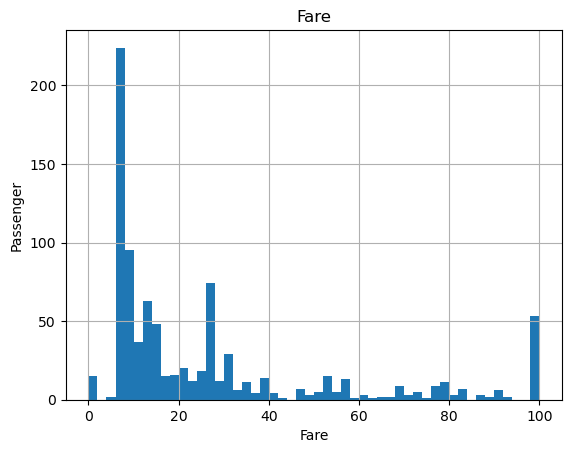

In [18]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Passenger')


Text(0, 0.5, 'Passenger')

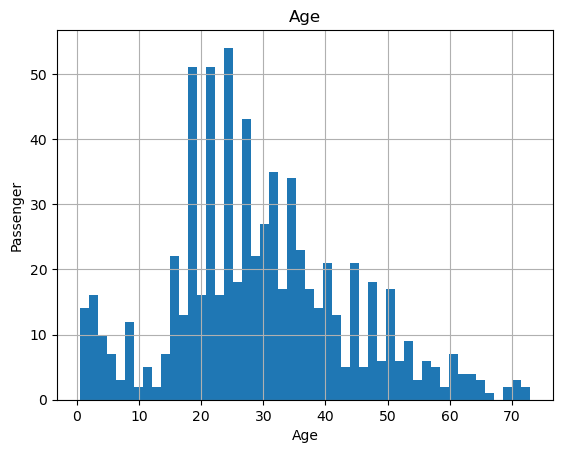

In [19]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Passenger')

### Applying ML algorithm

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [22]:
#### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
#y_predprob=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print('Accurcy{}:'.format(accuracy_score(y_test,y_pred)))
#print('ROC Score{}:'.format(roc_auc_score(y_test,y_predprob)))

Accurcy0.6716417910447762:


In [23]:
#### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
#y_predprob=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print('Accurcy{}:'.format(accuracy_score(y_test,y_pred)))
#print('ROC Score{}:'.format(roc_auc_score(y_test,y_predprob)))

Accurcy0.664179104477612:
